In [1]:
from datascience import *

In [45]:
# Read the San Francisco Bike Share dataset using the read_table method
trip = Table.read_table('trip.csv').relabeled(3, 'Start').relabeled(6, 'End').where('duration', are.below(1800)).select(3, 6, 1)
trip.sort('duration', descending = True)

Start,End,duration
Post at Kearny,Post at Kearny,1799
Market at 10th,San Francisco Caltrain 2 (330 Townsend),1799
Washington at Kearny,Embarcadero at Sansome,1799
Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1799
Grant Avenue at Columbus Avenue,Howard at 2nd,1799
Grant Avenue at Columbus Avenue,Grant Avenue at Columbus Avenue,1799
Market at 4th,Market at 4th,1799
Davis at Jackson,Harry Bridges Plaza (Ferry Building),1799
Steuart at Market,Embarcadero at Vallejo,1799
Beale at Market,Post at Kearny,1799


In [8]:
# Trips that lasted less than 30 minutes
commute = trip.where('duration', are.below(1800))
commute

id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


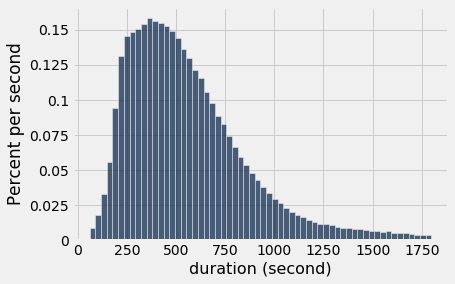

In [5]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

commute.hist('duration', bins = 60, unit = 'second')

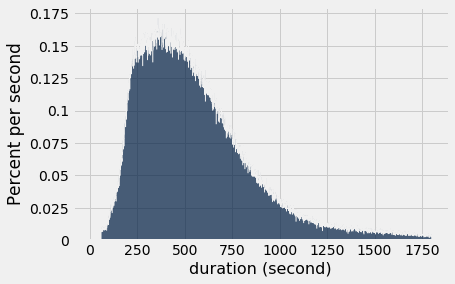

In [11]:
import numpy as np
commute.hist('duration', bins = np.arange(1801), unit='second')

In [41]:
starts = commute.group('start_station_name').sort('count', descending=True).relabeled(0, 'Start Station')
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),48179
San Francisco Caltrain 2 (330 Townsend),33280
Harry Bridges Plaza (Ferry Building),29106
Temporary Transbay Terminal (Howard at Beale),25750
2nd at Townsend,25042
Embarcadero at Sansome,24838
Steuart at Market,23761
Townsend at 7th,23379
Market at Sansome,23167
Market at 10th,19435


In [21]:
Duration = commute.select(3, 6, 1)
Duration

start_station_name,end_station_name,duration
South Van Ness at Market,South Van Ness at Market,63
San Jose City Hall,San Jose City Hall,70
Mountain View City Hall,Mountain View City Hall,71
San Jose City Hall,San Jose City Hall,77
South Van Ness at Market,Market at 10th,83
Golden Gate at Polk,Golden Gate at Polk,103
Santa Clara at Almaden,Adobe on Almaden,109
San Salvador at 1st,San Salvador at 1st,111
South Van Ness at Market,South Van Ness at Market,113
San Jose City Hall,MLK Library,114


In [22]:
Average = Duration.group([0, 1], np.average)
Average.relabeled(0, 'Start Station').relabeled(1, 'End Station').relabeled(2, 'Duration').sort(2, descending = True)

Start Station,End Station,Duration
University and Emerson,Franklin at Maple,1776
Redwood City Caltrain Station,Cowper at University,1759
Mountain View Caltrain Station,California Ave Caltrain Station,1740
Franklin at Maple,Palo Alto Caltrain Station,1730
Franklin at Maple,University and Emerson,1704.5
San Antonio Shopping Center,Palo Alto Caltrain Station,1666.33
California Ave Caltrain Station,Mountain View Caltrain Station,1648.67
Palo Alto Caltrain Station,San Antonio Shopping Center,1646
Castro Street and El Camino Real,California Ave Caltrain Station,1645
San Antonio Shopping Center,Cowper at University,1631


In [23]:
stations = Table.read_table('station.csv')
stations

id,name,lat,long,dock_count,city,installation_date
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [24]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [34]:
sf = stations.where('city', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=5)

In [36]:
stations.group('city')

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [38]:
colors = stations.group('city').with_column(
    'color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [40]:
colored = stations.join('city', colors).select('lat', 'long', 'name', 'color')
Marker.map_table(colored)

In [42]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,id,lat,long,dock_count,city,installation_date,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,15611
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,18046
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,25042
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,12894
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,1173
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,1361
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,15175
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,9957
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,780
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1864


In [46]:
# The name of the station where the most rentals ended (assume no ties).
trip.group('End').sort('count', descending=True).column(0).item(0)

'San Francisco Caltrain (Townsend at 4th)'

In [47]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

21

In [55]:
trip.drop(0).group('End', np.average).where(1, are.above(600)).sort(1, descending = True).relabeled(1, 'Average Duration')

End,Average Duration
San Jose Government Center,1197.96
University and Emerson,855.257
Park at Olive,834.064
California Ave Caltrain Station,811.738
Stanford in Redwood City,762.195
Golden Gate at Polk,758.851
Embarcadero at Sansome,755.399
San Francisco City Hall,754.693
South Van Ness at Market,750.644
Powell at Post (Union Square),724.918


In [59]:
full_census_table = Table.read_table("http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv")
partial = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [61]:
# The average duration of all trips in minutes
np.average(trip.column('duration')) / 60

9.289878299010914

In [65]:
# The average duration of trips that started and ended at the same station in minutes
np.average(trip.where(trip.column('Start') == trip.column('End')).column('duration')) / 60

12.884538933540748

In [69]:
# The average duration of trips that started and ended at different stations in minutes
np.average(trip.where(trip.column('Start') != trip.column('End')).column('duration')) / 60

9.223145716313354